In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../Ficheiros/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Ficheiros/train.csv'

In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095


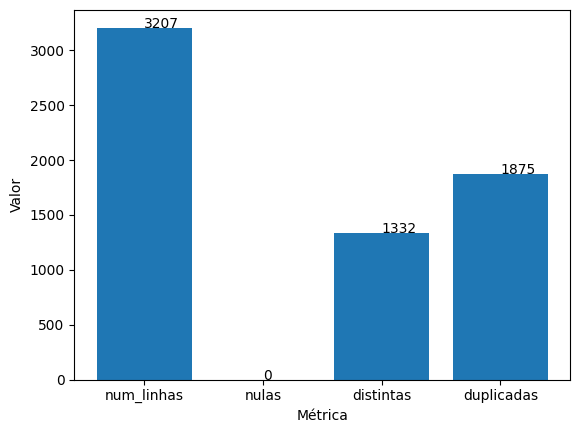

In [6]:
data = [
    df.shape[0],
    df["price"].isnull().sum(),
    df["price"].nunique(),
    df["price"].duplicated().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

In [6]:
# 1 dólar corresponde a 0.91 euros
taxa_de_cambio = 0.91

# Converter a coluna 'price' para euros
df['price_eur'] = df['price'] * taxa_de_cambio

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df[['price', 'price_eur']].head())

   price  price_eur
0  10300    9373.00
1  38005   34584.55
2  54598   49684.18
3  15500   14105.00
4  34999   31849.09


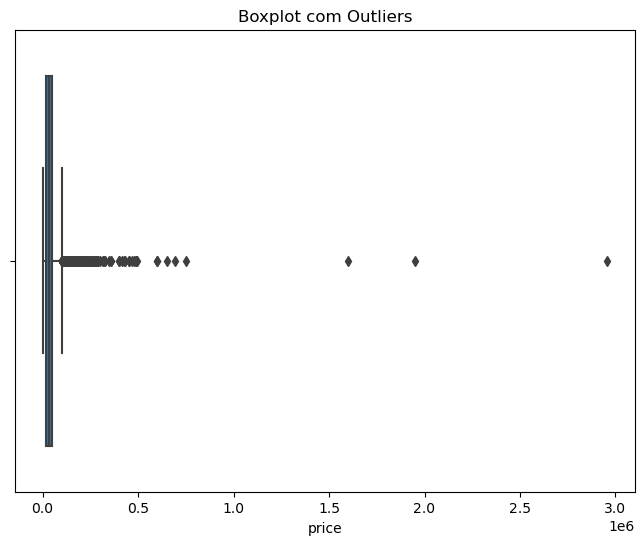

In [7]:
# Calcular o primeiro e terceiros quartis (Q1 e Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limite superior mais conservador para identificação de outliers
limite_superior = Q3 + 1.5 * IQR

# Filtrar DataFrame para remover outliers
df_filtrado = df[df['price'] <= limite_superior]

# Criar um boxplot com destaque para outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], showfliers=True)
plt.title('Boxplot com Outliers')
plt.show()

In [8]:
# Exibir o limite superior
print("Limite Superior para Identificação de Outliers:", limite_superior)

Limite Superior para Identificação de Outliers: 99175.0


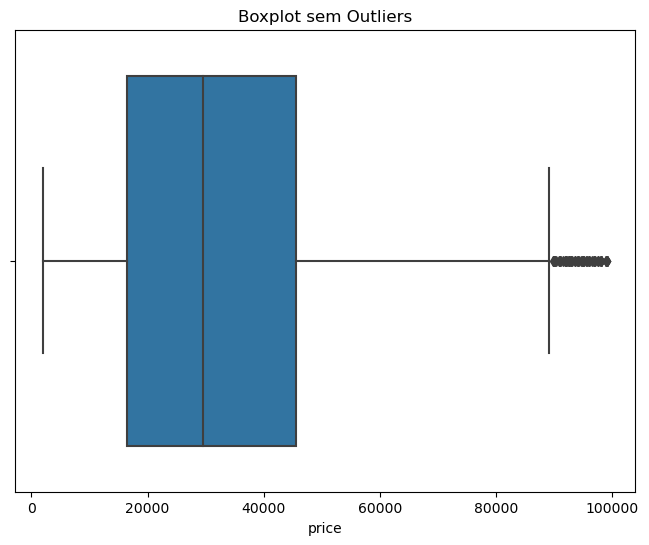

In [9]:
# Criar um boxplot sem outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['price'], showfliers=True)
plt.title('Boxplot sem Outliers')
plt.show()